In [1]:
import pandas as pd               #Package untuk pemrosesan data

import numpy as np                #Package untuk perhitungan

import matplotlib.pyplot as plt   #Package untuk visualisasi data dasar

import matplotlib.dates as mdates #Package untuk menyediakan format visualisasi data deret waktu

from matplotlib import cm         #Package untuk penentuan warna peta

import plotly.express as px       #Package untuk visualisasi data lain

import plotly.graph_objects as go #Package untuk visualisasi data lain

import seaborn as sns             #Package untuk visualisasi data lanjut

import os                         #Package untuk mengatur akses file

from datetime import datetime     #Package untuk mengatur format tanggal

import gc                         #Package untuk menghapus dataframe yang sudah tidak dipakai

import warnings                   #Package untuk mematikan peringatan eror user
warnings.filterwarnings('ignore')

In [2]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/capital-bikeshare-dataset-202005202408/station_list.csv
/kaggle/input/capital-bikeshare-dataset-202005202408/weather.csv
/kaggle/input/capital-bikeshare-dataset-202005202408/usage_frequency.csv
/kaggle/input/capital-bikeshare-dataset-202005202408/daily_rent_detail.csv
/kaggle/input/dash-app/new_app.py


In [3]:
path = '/kaggle/input/capital-bikeshare-dataset-202005202408/'
bike = pd.read_csv(path+'daily_rent_detail.csv')
# station = pd.read_csv(path+'station_list.csv') #Memiliki kolom yang ada pada tabel lain. Redundant
usage = pd.read_csv(path+'usage_frequency.csv')
# weather = pd.read_csv(path+'weather.csv') #Cuaca tidak dipilih dalam analisis data

In [4]:
bike.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,946D42AD89539210,docked_bike,2020-05-30 17:25:29,2020-05-31 18:25:22,Anacostia Library,31804,11th & H St NE,31614.0,38.865784,-76.978400,38.899983,-76.991383,casual
1,CC46FAAB662B8613,docked_bike,2020-05-09 14:42:04,2020-05-09 15:06:33,10th & E St NW,31256,21st St & Constitution Ave NW,31261.0,38.895914,-77.026064,38.892459,-77.046567,member
2,72F00B2FB833D6ED,docked_bike,2020-05-24 17:27:19,2020-05-24 17:43:51,Connecticut Ave & Newark St NW / Cleveland Park,31305,12th & U St NW,31268.0,38.934267,-77.057979,38.916787,-77.028139,member
3,4DFBE6AED989DF35,docked_bike,2020-05-27 15:29:52,2020-05-27 15:47:13,Connecticut Ave & Newark St NW / Cleveland Park,31305,14th & Belmont St NW,31119.0,38.934267,-77.057979,38.921074,-77.031887,casual
4,1AAFE6B4331AB9DF,docked_bike,2020-05-31 14:06:03,2020-05-31 14:30:30,Georgia Ave & Morton St NW,31419,17th & K St NW,31213.0,38.932128,-77.023500,38.902760,-77.038630,casual


In [5]:
bike.duplicated().sum()

0

In [6]:
usage['date'] = usage['date'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d'))

In [7]:
bike['started_at'] = pd.to_datetime(bike['started_at'], format='mixed')
bike['ended_at'] = pd.to_datetime(bike['ended_at'], format='mixed')
bike['date'] = bike['started_at'].dt.date

In [8]:
bike.fillna('Others', inplace=True)

In [9]:
for i in bike.columns:
    bike = bike[bike[i]!='Others']

In [10]:
bike['gap'] = bike['ended_at'] - bike['started_at']

# Extract minute and hours from the time difference
bike['minute'] = bike['gap'].dt.seconds //60
bike['hours'] = bike['gap'].dt.seconds // 3600

In [11]:
bike = bike.drop('ride_id', axis=1)
bike = bike.drop('end_lat', axis=1)
bike = bike.drop('end_lng', axis=1)


In [12]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13928217 entries, 0 to 16085888
Data columns (total 14 columns):
 #   Column              Dtype          
---  ------              -----          
 0   rideable_type       object         
 1   started_at          datetime64[ns] 
 2   ended_at            datetime64[ns] 
 3   start_station_name  object         
 4   start_station_id    object         
 5   end_station_name    object         
 6   end_station_id      object         
 7   start_lat           object         
 8   start_lng           object         
 9   member_casual       object         
 10  date                object         
 11  gap                 timedelta64[ns]
 12  minute              int32          
 13  hours               int32          
dtypes: datetime64[ns](2), int32(2), object(9), timedelta64[ns](1)
memory usage: 1.5+ GB


In [13]:
usage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 873318 entries, 0 to 873317
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   date            873318 non-null  datetime64[ns]
 1   station_name    873318 non-null  object        
 2   pickup_counts   873318 non-null  int64         
 3   dropoff_counts  873318 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 26.7+ MB


In [14]:
# Menampilkan tabel statistika khusus kolom kategorik

bike.describe()

,started_at,ended_at,gap,minute,hours
count,13928217,13928217,13928217,1.392822e+07,1.392822e+07
mean,2022-10-26 17:21:31.134011904,2022-10-26 17:43:32.694582272,0 days 00:22:01.560573466,1.966184e+01,9.120270e-02
min,2020-05-01 00:02:02,2020-05-01 00:04:10,-21 days +19:36:07,0.000000e+00,0.000000e+00
25%,2021-10-26 13:17:18,2021-10-26 13:37:03,0 days 00:06:40,6.000000e+00,0.000000e+00
50%,2022-11-21 07:25:24,2022-11-21 07:38:47,0 days 00:11:32,1.100000e+01,0.000000e+00
75%,2023-10-24 18:55:05,2023-10-24 19:09:30,0 days 00:20:23,2.000000e+01,0.000000e+00
max,2024-08-31 23:55:45.243000,2024-08-31 23:59:28.212000,232 days 03:08:55,1.439000e+03,2.300000e+01
std,NaN,NaN,0 days 09:45:52.815635599,5.237719e+01,8.254799e-01


In [15]:
# Membuat method pembuatan tabel agregasi berdasarkan kebutuhan

def group_by_method(stat_metric, keycol):

 return bike.groupby(keycol).agg(

    minute = ('minute', stat_metric),

    hours = ('hours', stat_metric),

    lat = ('start_lat', stat_metric),

    lng = ('start_lng', stat_metric)

)

In [16]:
# Pembuatan tabel agregasi berdasarkan stasiun

agg = group_by_method('mean',['start_station_id','start_station_name'])

In [17]:
agg.reset_index(inplace=True)

In [18]:
agg.rename(columns = {'start_station_name':'station_name'}, inplace = True)
agg.rename(columns = {'start_station_id':'station_id'}, inplace = True)
agg.rename(columns = {'start_lat':'Latitude'}, inplace = True)
agg.rename(columns = {'start_lng':'Longitude'}, inplace = True)

In [19]:
usage_agg = usage.groupby('station_name').agg(

    pickup_counts = ('pickup_counts', 'mean'),

    dropoff_counts = ('dropoff_counts', 'mean')

)

In [20]:
pick_usage = usage_agg.sort_values(by=['pickup_counts'], ascending=False)
drop_usage = usage_agg.sort_values(by=['dropoff_counts'], ascending=False)

In [21]:
pick_usage.reset_index(inplace=True)
drop_usage.reset_index(inplace=True)

In [22]:
rent_day =  bike.groupby('date').agg(

    minute = ('minute', 'mean'),

    hours = ('hours', 'mean'),

    lat = ('start_lat', 'mean'),

    lng = ('start_lng', 'mean')

)

In [23]:
# start_station_name end_station_name viz using tree map
def plot_treemap(column):
    df_tree = bike[column].value_counts().reset_index()
    df_tree.columns = ['mode', 'count']
    df_tree['mode'] = df_tree['mode'].astype(str)
    df_tree = df_tree.sort_values(by=['mode'])
    df_tree = df_tree.head(10)
    fig = px.treemap(
        df_tree,
        path=['mode'],
        values='count',
        color_discrete_sequence=px.colors.qualitative.Antique
    )
    fig.show()

In [24]:
plot_treemap('start_station_name')

In [25]:
plot_treemap('end_station_name')

In [26]:
# Rideable type and member casual viz using bar plot
def plot_bar(column):
    df_tree = bike[column].value_counts().reset_index()
    df_tree.columns = ['mode', 'count']
    df_tree['mode'] = df_tree['mode'].astype(str)
    df_tree = df_tree.sort_values(by=['mode']).head(10)  # Limit to top 10 categories for better visualization
    
    fig = px.bar(
        df_tree,
        x='mode',
        y='count',
        color='mode',
        color_discrete_sequence=px.colors.qualitative.Antique,
        title=f"Top 10 {column} counts"
    )
    fig.update_layout(
        xaxis_title=column.capitalize(),
        yaxis_title="Count",
        showlegend=False
    )
    fig.show()

In [27]:
plot_bar('rideable_type')

In [28]:
plot_bar('member_casual')

In [29]:
# EDA Menggunakan Boxplot untuk mengetahui keberadaan outlier

def boxplot(data):
  numerik = data.select_dtypes(include=['float64','int64','int32']).columns
  
  plt.figure(figsize=(18,10))

  for i in range(0, len(numerik)):

    plt.subplot(4, 6, i+1)

    sns.boxplot(y = data[numerik[i]], color='green', orient='v')

    # plt.title(title)

    plt.tight_layout()

In [30]:
# EDA Menggunakan Histogram dan KDE plot

def histogram(data):
  numerik = data.select_dtypes(include=['float64','int64','int32']).columns

  plt.figure(figsize=(18, 10))

  for i in range(0, len(numerik)):

      plt.subplot(4, 6, i+1)

      sns.histplot(data[numerik[i]], color='green', label=i, kde=True)
      
      # plt.title(title)

      plt.tight_layout()

In [31]:
def plot_tree_1(df, column):
    fig = px.treemap(
        df,
        path=['station_name'],
        values=column,
        color_discrete_sequence=px.colors.qualitative.Antique
    )
    fig.show()

Pengambilan dan Peletakan Sepeda berdasarkan nama jalan

In [32]:
plot_tree_1(pick_usage.head(20), 'pickup_counts')

In [33]:
plot_tree_1(pick_usage.tail(20), 'pickup_counts')

In [34]:
plot_tree_1(drop_usage.head(20), 'pickup_counts')

In [35]:
plot_tree_1(drop_usage.tail(20), 'pickup_counts')

In [36]:
plot_tree_1(pick_usage.head(20), 'dropoff_counts')

In [37]:
plot_tree_1(pick_usage.tail(20), 'dropoff_counts')

In [38]:
plot_tree_1(drop_usage.head(20), 'dropoff_counts')

In [39]:
plot_tree_1(drop_usage.tail(20), 'dropoff_counts')

Rata-rata Pengambilan dan peletakan sepeda tiap stasiun per hari

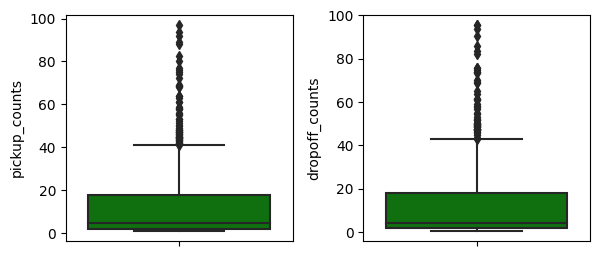

In [40]:
boxplot(pick_usage)

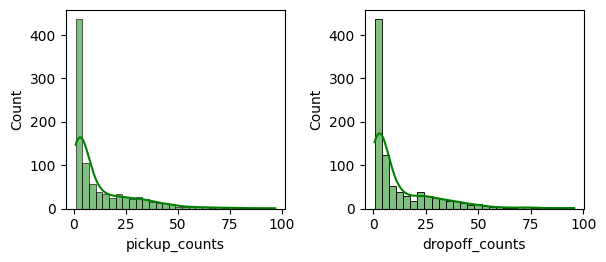

In [41]:
histogram(pick_usage)

In [42]:
def plot_map(data, indicator, color_map, title):
    """
    Parameters:
    - data: DataFrame that contains station data with 'lat' and 'lng' columns.
    - indicator: The column to be visualized as a color gradient.
    - color_map: Color scale for the map.
    - title: Title of the plot.
    """

    # Create the map with Plotly
    fig = px.scatter_mapbox(
        data,
        lat="lat",
        lon="lng",
        color=indicator,
        color_continuous_scale=color_map,
        size_max=15,
        zoom=10,
        hover_name="station_name",  # Station names on hover
        title=title,
    )

    # Configure the layout to use a mapbox style
    fig.update_layout(
        mapbox_style="carto-positron",
        mapbox_zoom=10,
        mapbox_center={"lat": data["lat"].mean(), "lon": data["lng"].mean()},
        title=title,
    )

    # Show the map
    fig.show()


In [43]:
plot_map(data=agg, indicator='hours', color_map='Plasma', title='Rata-rata lama peminjaman per jam')    # plot_map(data = agg, indicator=i, color_map='plasma', title=f'Rata-rata lama peminjaman per {i}')

In [44]:
# Method untuk mencetak tren pengambilan sepeda atau penaruhan sepeda

def time_series(data,indicator, daftar_stasiun, title):

  """
    Parameters:

    - data: DataFrame yang mengandung data stasiun.

    - indicator: Lama peminjaman

    - daftar_stasiun: daftar stasiun yang ingin dilihat.

    - x_limits: Skala peta (longitude).

    - y_limits: Skala peta (latitude).

    """

  timeseries = data[data['station_name'].isin(daftar_stasiun)]

  plt.figure(figsize=(18, 6))

  ax = sns.lineplot(x='date', y=indicator, data=timeseries, hue='station_name')

  ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

  ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

  plt.xlabel('Tanggal')

  plt.ylabel('Jumlah')

  plt.xticks(rotation=25, ha='right', fontsize=10)

  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

  plt.title(title)

  plt.show()

In [45]:
# time_series(data=usage,indicator='minute',daftar_stasiun = '10th & E St NW' )

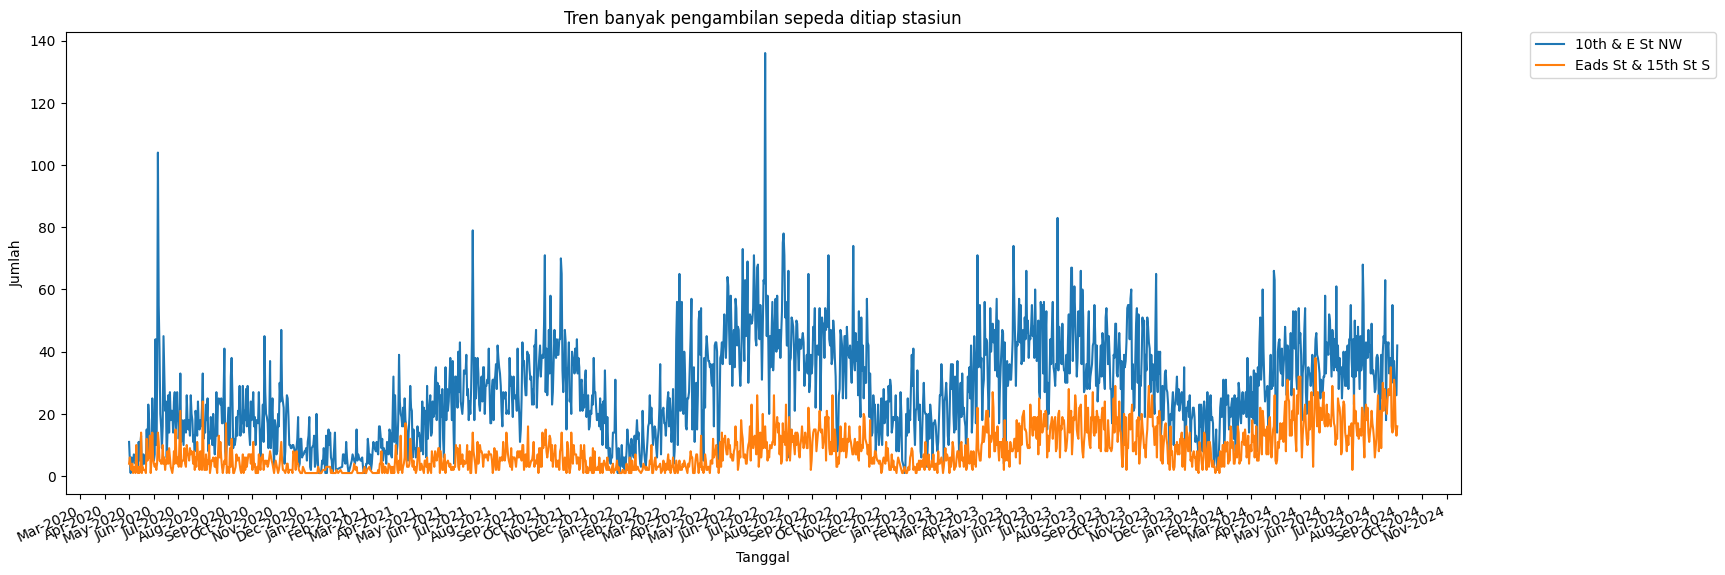

In [46]:
time_series(data=usage,indicator='pickup_counts',daftar_stasiun = ['10th & E St NW','Eads St & 15th St S'] , title='Tren banyak pengambilan sepeda ditiap stasiun')

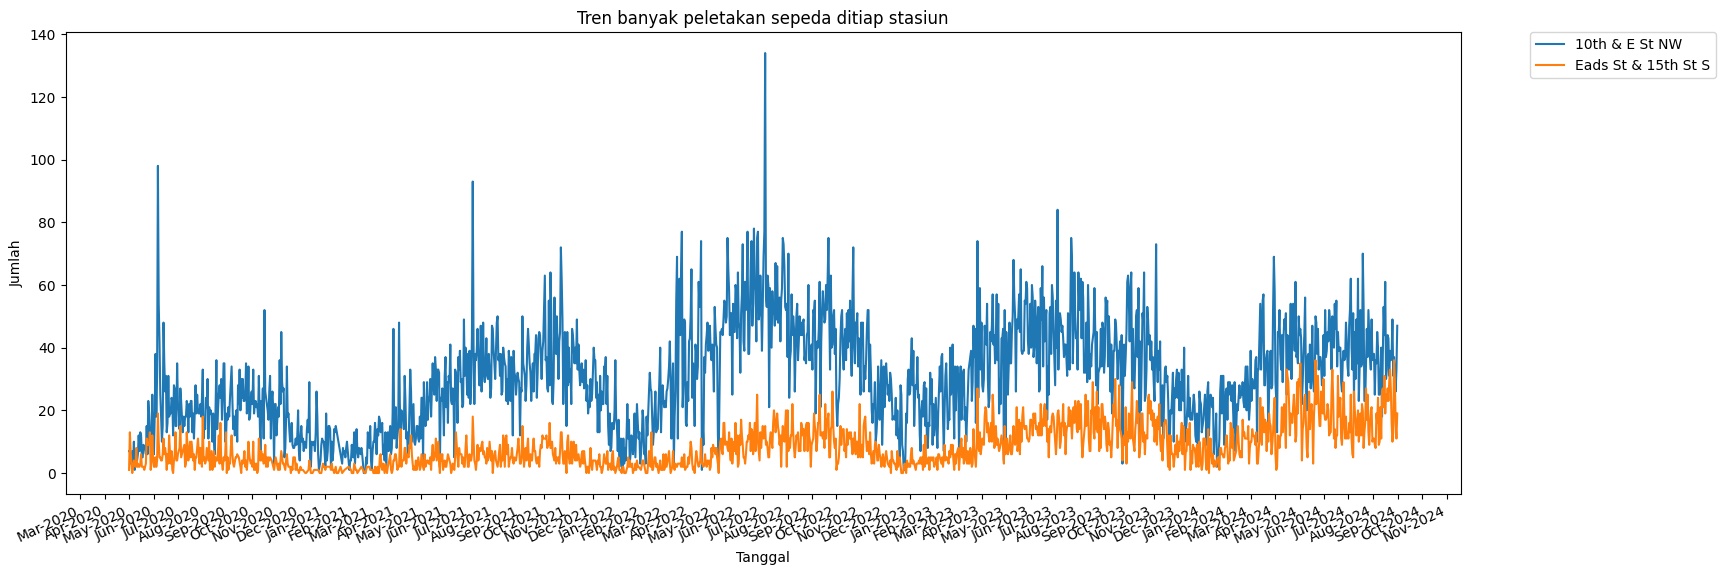

In [47]:
time_series(data=usage,indicator='dropoff_counts',daftar_stasiun = ['10th & E St NW','Eads St & 15th St S'],title= 'Tren banyak peletakan sepeda ditiap stasiun' )

Distribusi rata-rata lama peminjaman sepeda per hari

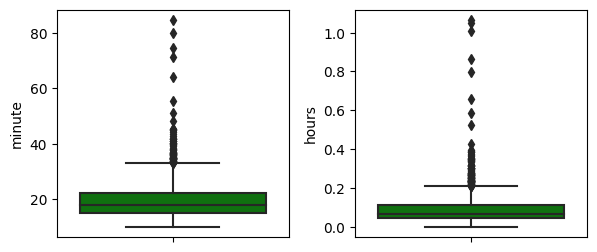

In [48]:
boxplot(rent_day)

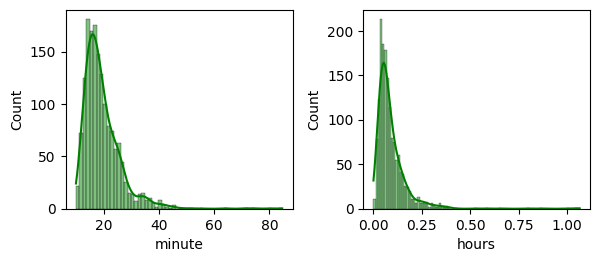

In [49]:
histogram(rent_day)

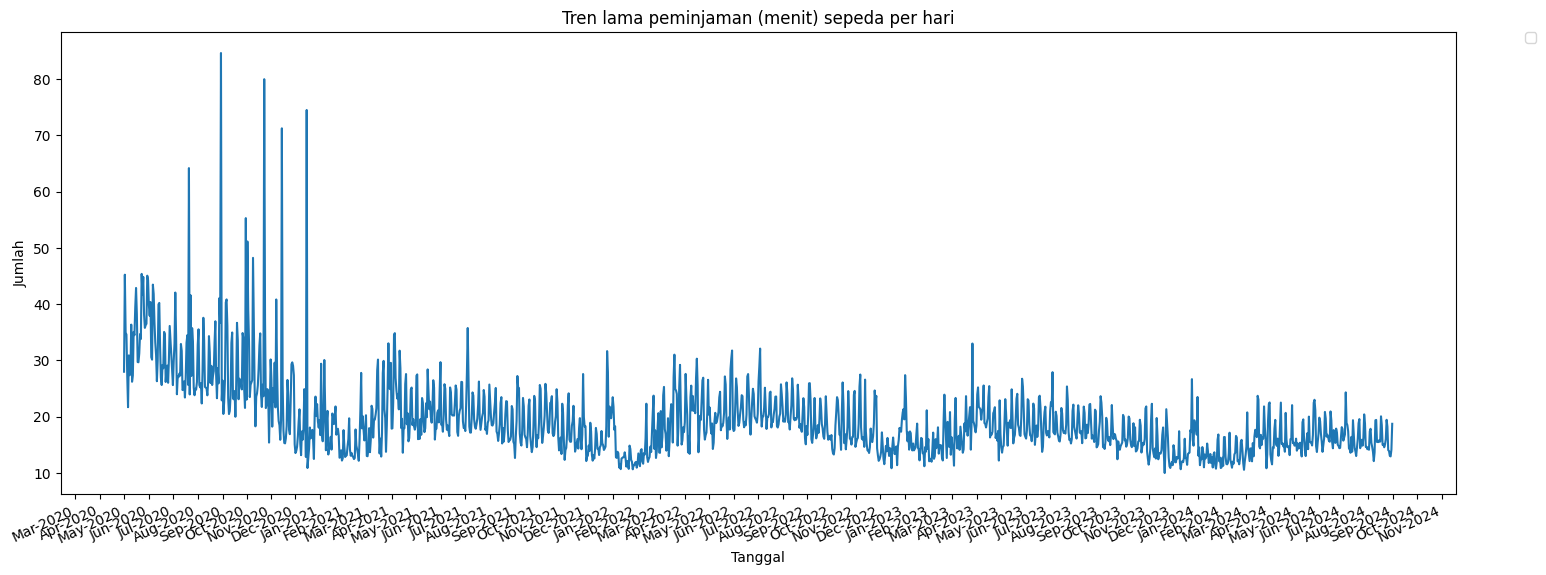

In [50]:
plt.figure(figsize=(18, 6))

ax = sns.lineplot(x='date', y='minute', data=rent_day)

ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%Y'))

plt.xlabel('Tanggal')

plt.ylabel('Jumlah')

plt.xticks(rotation=25, ha='right', fontsize=10)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

plt.title('Tren lama peminjaman (menit) sepeda per hari')

plt.show()